<a href="https://www.kaggle.com/code/enricofindley/usa-similarity-percentage-with-cosine-similarity?scriptVersionId=140948919" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Installing Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [16]:
# Load and preprocess data
data = pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')
data

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


After that we will be doing basic EDA

In [4]:
data.shape

(195, 35)

In [5]:
data.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [7]:
data.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

And doing necessary remove missing values

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

print the correlation matrix

In [23]:
data.corr()

/tmp/ipykernel_32/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
Birth Rate,1.000000,0.072071,0.981069,0.867456,-0.874747,0.768078,-0.740290,-0.502965,0.039247
Calling Code,0.072071,1.000000,0.028379,-0.030603,-0.034624,-0.130962,-0.041556,0.012973,0.194236
Fertility Rate,0.981069,0.028379,1.000000,0.852653,-0.849153,0.779460,-0.683172,-0.457999,0.034218
Infant mortality,0.867456,-0.030603,0.852653,1.000000,-0.924675,0.874135,-0.691382,-0.436380,0.037578
Life expectancy,-0.874747,-0.034624,-0.849153,-0.924675,1.000000,-0.831797,0.703740,0.472759,-0.072483
Maternal mortality ratio,0.768078,-0.130962,0.779460,0.874135,-0.831797,1.000000,-0.582919,-0.330127,-0.015930
Physicians per thousand,-0.740290,-0.041556,-0.683172,-0.691382,0.703740,-0.582919,1.000000,0.526565,-0.064380
Latitude,-0.502965,0.012973,-0.457999,-0.436380,0.472759,-0.330127,0.526565,1.000000,0.013635
Longitude,0.039247,0.194236,0.034218,0.037578,-0.072483,-0.015930,-0.064380,0.013635,1.000000


/tmp/ipykernel_32/771211689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


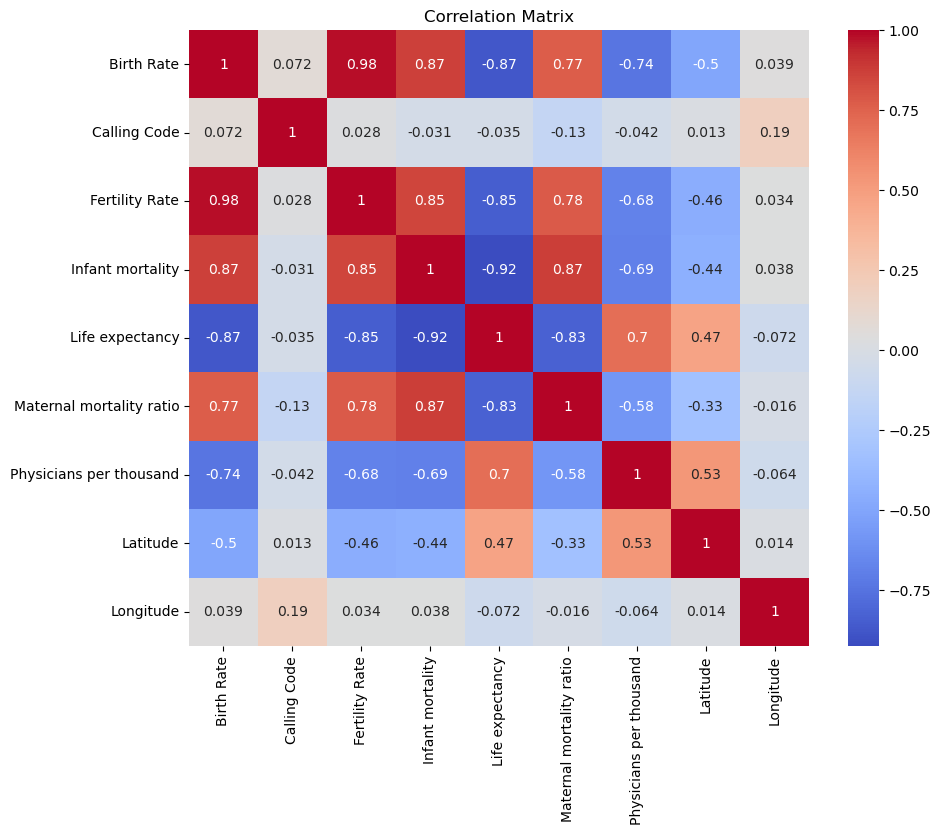

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Next, we are going to select all relevant column except column <code>Country</code>,<code>Abbreviation</code>,<code>Calling Code</code>,<code>Capital/Major City</code>, <code>Currency-Code</code>, <code>Largest city</code>, <code>Official language</code>, <code>Latitude</code>,and <code>Longitude</code>

In [ ]:
dropped_features = [
    'Country','Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code', 'Largest city', 'Official language', 'Latitude', 'Longitude'
]
data_selected = data.drop(data[dropped_features], axis=1)
data_selected.info()

In [ ]:
# Select the target country's data (you can replace 'Target Country' with the actual country name)
target_country_data = data[data['Country'] == 'Indonesia'].iloc[0, :-1].values

# Calculate cosine similarity with other countries
similarities = cosine_similarity(target_country_data.reshape(1, -1), data_selected.iloc[:, :-1])
# Find the most similar countries
num_similar_countries = 5  # You can adjust the number of similar countries
similar_country_indices = np.argsort(similarities[0])[-num_similar_countries-1:-1][::-1]  # -1 to exclude target country

# Get life expectancies of similar countries
similar_country_life_expectancies = data_selected.iloc[similar_country_indices, -1]

# Calculate the prediction as the average life expectancy of similar countries
prediction = similar_country_life_expectancies.mean()

print(f"Predicted Life Expectancy for Target Country: {prediction:.2f}")


In [ ]:
data_selected.iloc[:, :-1]